Abdelfattah Moawed Abdelfattah 
Abdelrahman Mohammed Abdeltawab

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as mp
 

In [25]:
x_df =pd.read_excel("./dataset/gain1010.xlsx",header=[0,1])
y_df = pd.read_excel("./dataset/ygain1010.xlsx")


In [26]:
x_df.isnull().sum()

x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   (t0, T01)  4688 non-null   float64
 1   (t0, H01)  4688 non-null   float64
 2   (t0, T02)  4688 non-null   float64
 3   (t0, H02)  4688 non-null   float64
 4   (t1, T11)  4688 non-null   float64
 5   (t1, H11)  4688 non-null   float64
 6   (t1, T12)  4688 non-null   float64
 7   (t1, H12)  4688 non-null   float64
 8   (t2, T21)  4688 non-null   float64
 9   (t2, H21)  4688 non-null   float64
 10  (t2, T22)  4688 non-null   float64
 11  (t2, H22)  4688 non-null   float64
dtypes: float64(12)
memory usage: 439.6 KB


In [27]:
x_df.isnull().sum()

t0  T01    0
    H01    0
    T02    0
    H02    0
t1  T11    0
    H11    0
    T12    0
    H12    0
t2  T21    0
    H21    0
    T22    0
    H22    0
dtype: int64

In [28]:
x_df.duplicated().sum()

np.int64(0)

In [29]:
x_df.shape

(4688, 12)

In [30]:
x_df.value_counts()

(t0, T01)  (t0, H01)  (t0, T02)  (t0, H02)  (t1, T11)  (t1, H11)  (t1, T12)  (t1, H12)  (t2, T21)  (t2, H21)  (t2, T22)  (t2, H22)
300.30     46.33      30.23      45.04      300.30     46.36      30.23      45.04      300.20     46.36      30.24      45.04        1
           46.30      30.23      45.18      300.40     46.26      30.23      45.11      300.30     46.23      30.23      45.11        1
                      30.22      45.37      300.20     46.26      30.23      45.31      300.20     46.30      30.22      45.28        1
                                 45.18      300.30     46.30      30.23      45.18      300.40     46.26      30.23      45.11        1
           46.23      30.25      45.14      300.30     46.20      30.23      45.14      300.50     46.16      30.25      45.14        1
                                                                                                                                     ..
26.31      73.03      26.45      73.45      26.33    

In [31]:
y_df

,1
0,1
1,1
2,1
3,1
4,1
...,...
4683,1
4684,1
4685,1
4686,1


In [32]:
y_df = y_df.replace({'-1':0})


In [33]:
y_df

,1
0,1
1,1
2,1
3,1
4,1
...,...
4683,1
4684,1
4685,1
4686,1


In [34]:
scaler = StandardScaler()


In [35]:
x_df.head()

t0                          t1                          t2         \
     T01    H01    T02    H02    T11    H11    T12    H12    T21    H21   
0  30.21  43.82  30.16  43.05  30.20  43.79  30.17  43.05  30.19  43.79   
1  30.20  43.79  30.17  43.05  30.19  43.79  30.17  43.05  30.19  43.79   
2  30.19  43.79  30.17  43.05  30.19  43.79  30.19  43.12  30.19  43.79   
3  30.19  43.79  30.19  43.12  30.19  43.79  30.18  43.09  30.19  43.79   
4  30.19  43.79  30.18  43.09  30.19  43.79  30.18  43.09  30.19  43.79   

                 
     T22    H22  
0  30.17  43.05  
1  30.19  43.12  
2  30.18  43.09  
3  30.18  43.09  
4  30.18  43.09

In [36]:
x_train, x_test , y_train , y_test = train_test_split(x_df,y_df,test_size=0.2,random_state=42)

Confusion Matrix:
 [[103   1]
 [  0 834]]
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.99      1.00       104
           1       1.00      1.00      1.00       834

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938

Accuracy Score: 99.89339019189765


/home/abdo/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

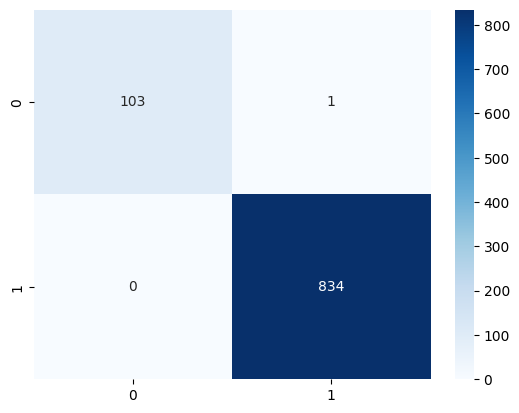

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
